https://stackoverflow.com/questions/77669310/double-exponential-fit-in-python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.metrics import r2_score

In [2]:
def model(x, a, b, c, d, e):
    return a * np.exp(-b * x) + c * np.exp(-d * x) + e

In [3]:
#p0 = np.array([-1622.6092323, -15.038877, 1713.45499496, -15.33871455, -1.92259733])
p0 = np.array([1.7, 1.1, -0.4, 4.2, 1.])

In [4]:
np.random.seed(12345)
x = np.linspace(-0.5, 2.0, 75)
y = model(x, *p0)
s = 0.01 * np.ones_like(y)
n = s * np.random.normal(size=y.size)
yexp = y + n

In [5]:
popt, pcov = optimize.curve_fit(
    model, x, yexp, sigma=s,
    p0=[1, 1, -1, 1, 1], absolute_sigma=True
)
popt, pcov

(array([ 1.69688017,  1.12521179, -0.40501112,  4.20277186,  1.01146397]),
 array([[ 0.0002596 ,  0.00037287, -0.00035638, -0.0011122 ,  0.0001177 ],
        [ 0.00037287,  0.00090803, -0.00069421, -0.0020461 ,  0.00035846],
        [-0.00035638, -0.00069421,  0.00058512,  0.00178232, -0.00025642],
        [-0.0011122 , -0.0020461 ,  0.00178232,  0.00551396, -0.00074256],
        [ 0.0001177 ,  0.00035846, -0.00025642, -0.00074256,  0.00015181]]))

In [6]:
spopt = np.sqrt(np.diag(pcov))
spopt

array([0.01611205, 0.03013359, 0.02418927, 0.07425606, 0.01232132])

In [7]:
yhat = model(x, *popt)
score = r2_score(yexp, yhat)
score

0.9993359389294656

In [8]:
xlin = np.linspace(x.min(), x.max(), 200)
ylin = model(xlin, *popt)

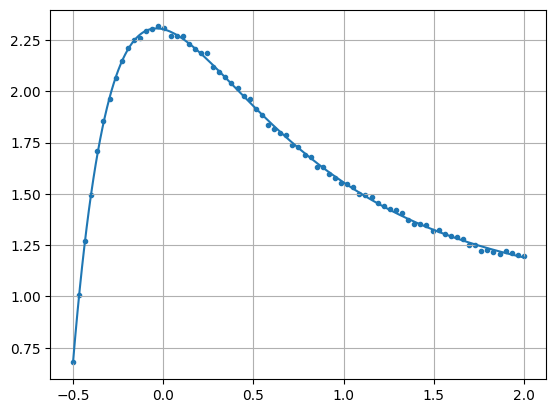

In [9]:
fig, axe = plt.subplots()
axe.scatter(x, yexp, marker=".")
axe.plot(xlin, ylin)
axe.grid()